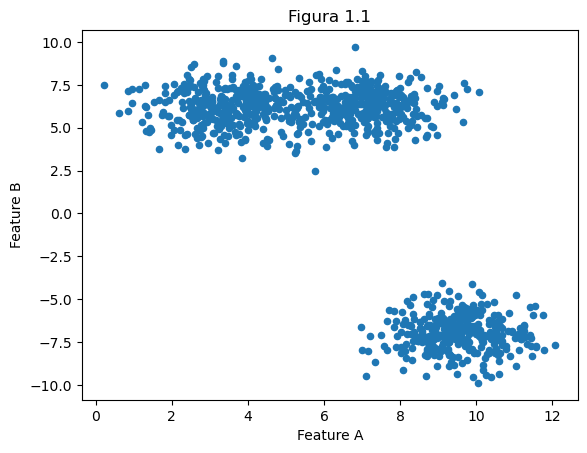

In [49]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#cargamos la informacion del ejercicio
data = np.load('KMeans/A.npy')
clase = np.load('KMeans/_.npy')

#graficamos cada uno de los puntos
#Nota: no esta siendo aplicado ningun algoritmo de clasificacion
fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1],s=20)
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Figura 1.1')
plt.show()

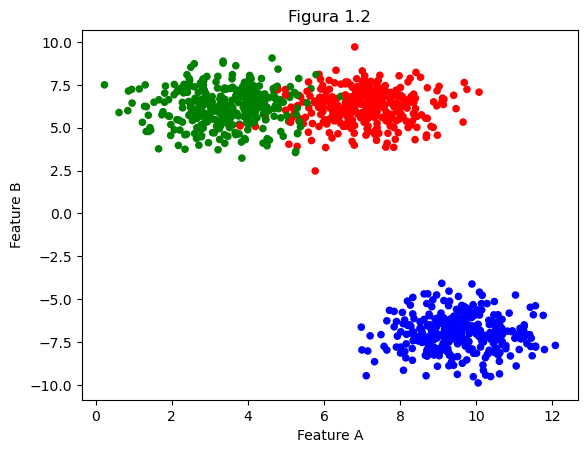

In [50]:
#Ahora los puntos graficados tendran el color de su respectiva clase

#guardamos dentro de un arreglo los colores que deberia tomar cada punto
#por ejemplo si su clase es 2, se lo asocia al color blue
Color=['red','green','blue']
aColor=[]

for i in clase:
    aColor.append(Color[i])

#graficamos
fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=aColor,s=20)
plt.title('Figura 1.2')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.show() 

centroide 0 = [3.35444549 6.20122929]
centroide 1 = [ 9.55006356 -6.98392902]
centroide 2 = [7.06860663 6.22234134]


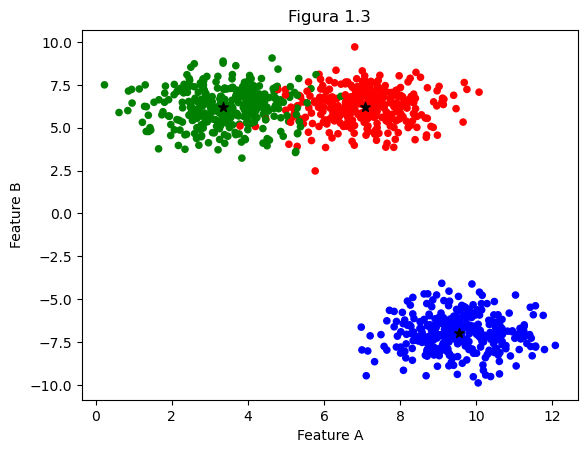

In [51]:
#Ahora aplicamos Kmeans, en el ejercicio se nos dice que el K debe ser igual a 3
#Nota: Kmeans es no supervisado, no necesita un valor de Y, tambien se le definio una semilla
#para que las etiquetas de los clusters no cambien de posicion

kmeans = KMeans(n_clusters=3, random_state=1).fit(data)

#obtenemos los centroides
centroids = kmeans.cluster_centers_

#mostramos los centroides obtenidos
for i in range(len(centroids)):
    print("centroide",i,"=",centroids[i])

#graficamos
fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=aColor,s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c="black", s=50)
plt.title('Figura 1.3')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.show()

In [52]:
Txt = '''el algoritmo Kmeans lo asocio con el siguiente arreglo de etiquetas, En donde se puede
observar que el data puede tener la etiqueta 0, 1 o 2, esto nos indica el color que tiene dicho punto. Sin embargo como 
es no supervisado no hereda la asociacion original en la que se establece que el cluster 0 es rojo, el cluster 1 es de 
color verde y el 3 azul, por lo que se debera hacer un ajuste para realizar predicciones. El arreglo de etiquetas es la 
siguiente:\n 
'''
print("Para el dataset de",len(kmeans.labels_),"elementos,",Txt)
print(kmeans.labels_)

Para el dataset de 1000 elementos, el algoritmo Kmeans lo asocio con el siguiente arreglo de etiquetas, En donde se puede
observar que el data puede tener la etiqueta 0, 1 o 2, esto nos indica el color que tiene dicho punto. Sin embargo como 
es no supervisado no hereda la asociacion original en la que se establece que el cluster 0 es rojo, el cluster 1 es de 
color verde y el 3 azul, por lo que se debera hacer un ajuste para realizar predicciones. El arreglo de etiquetas es la 
siguiente:
 

[2 1 1 0 2 2 1 2 2 0 1 2 1 2 1 1 1 2 0 2 0 0 1 2 2 1 2 2 2 0 1 0 0 2 0 1 0
 1 2 0 2 2 1 2 2 1 2 2 0 0 2 1 2 0 2 0 1 0 2 1 1 0 0 2 1 2 1 2 1 1 1 1 2 1
 2 1 1 0 1 0 2 0 2 0 1 0 0 2 2 1 1 0 0 0 2 1 0 0 2 1 2 1 0 1 2 2 1 2 2 0 0
 0 1 0 0 0 2 0 2 0 2 0 0 0 2 0 2 1 2 2 2 1 1 2 1 2 0 1 2 0 2 1 2 0 0 1 2 0
 2 2 1 2 2 1 1 2 0 2 1 2 1 1 1 2 1 1 2 1 1 1 0 2 0 2 1 2 0 0 2 1 0 0 1 1 1
 2 1 1 1 2 1 0 0 2 1 0 1 0 0 2 2 0 0 2 0 2 2 1 0 1 0 0 2 2 2 1 2 2 0 0 1 2
 0 1 2 1 1 0 1 0 1 0 2 2 0 1 1 0 1 2 0 1 1 2 0 2 1 0

[2. 5.] pertenece a la clase green
[3.2 6.5] pertenece a la clase green
[7.  2.5] pertenece a la clase red
[9.  3.2] pertenece a la clase red
[ 9. -6.] pertenece a la clase blue
[11. -8.] pertenece a la clase blue


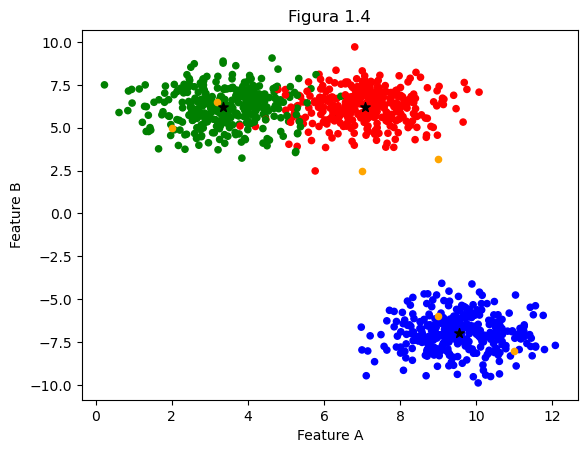

In [53]:
#Ahora que tenemos creado nuestro Kmeans, lo que haremos sera realizar unas predicciones
#tenemos un arreglo con 6 elementos, los cuales deberemos predecir a que color corresponde
test = np.array([[2,5],[3.2,6.5],[7,2.5],[9,3.2],[9,-6],[11,-8]])
predict = kmeans.predict(test)

#Nota: como Kmeans es no supervizado, se debe asociar cada color al cluster correspondiente
#en este caso se puede ver que el cluster con centro (3.4 , 6.2) pertenece a la clase verde (cluster 0),
#(9.6 , -7) pertenece a la clase azul (cluster 1), (7 , 6.2) pertenece a la clase roja (cluster 2)

#Asociamos cada color a su respectiva clase
Color2=['green','blue','red']

#mostramos las predicciones realizadas
for i in range(len(predict)):
    print(test[i], "pertenece a la clase", Color2[predict[i]])

#graficamos los datos obtenidos, colocando los puntos nuevos de color naranjo
fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=aColor,s=20)
plt.scatter(test[:, 0], test[:, 1], c="orange",s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c="black", s=50)
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Figura 1.4')
plt.show()